# Predictive Cart Pole

Assume random actions

- Predict next state given current state
- Let me use a small network and visualize the dynamics?

https://gymnasium.farama.org/environments/classic_control/cart_pole/

- Because we have the velocity, no need to history right now, unless you wanted the network to someone learn acceleration, etc.

- https://stats.stackexchange.com/questions/49953/classification-vs-regression-for-prediction-of-the-sign-of-a-continuous-respons

- Chat GPT didn't have a choice, as it was predicting discrete next variables
- Why discretize a continous variable though?
- Proof may be in the pudding...


In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch

env = gym.make('CartPole-v1')

print("Action Space: ", env.action_space)
print("Obs Space: ", env.observation_space)


SEED = 0
torch.manual_seed(SEED)


Action Space:  Discrete(2)
Obs Space:  Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [2]:
W = torch.normal(0,1,size=(6,6))

x = torch.zeros(size=(1,6)) # 4 obs, 1 reward, 1 action

params = [W]

for p in params:
    p.requires_grad = True


In [3]:
print(W)
print(x)

tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920],
        [-0.3160, -2.1152,  0.3223, -1.2633,  0.3500,  0.3081],
        [ 0.1198,  1.2377,  1.1168, -0.2473, -1.3527, -1.6959],
        [ 0.5667,  0.7935,  0.4397,  0.1124,  0.6408,  0.4412],
        [-0.2159, -0.7425,  0.5627,  0.2596,  0.5229,  2.3022],
        [-1.4689, -1.5867,  1.2032,  0.0845, -1.2001, -0.0048]],
       requires_grad=True)
tensor([[0., 0., 0., 0., 0., 0.]])


In [19]:
observation, info = env.reset(seed=SEED)
losses = []  # List to store loss values

In [20]:

for _ in range(1000):

    # forward pass - make prediction
    y =  x @ W
    obs_pred = y[0,:5]
    action = round(torch.sigmoid(y[0,5]).item())
    action = env.action_space.sample()  # agent policy that uses the observation and info
    # print("obs: ", obs)
    print(W[:,0])
    print(x[0,:]@W[:,0])
    print("pred: ", obs_pred)

    observation, reward, terminated, truncated, info = env.step(action)

    obs = np.append(observation,reward)
    obs = torch.tensor(obs).reshape(1,5)
    print("actual: ", obs)

    new_x = torch.zeros(size=(1,6)) 
    new_x[0:,:5] = obs
    new_x[0:,5] = torch.tensor([action], dtype=torch.float)

    #calculate prediction error
    loss = torch.abs(obs[0,0] - obs_pred[0]).mean()
    # print(f"pred {obs_pred[0]}")
    # print(f"actual {obs[0,0]}")

    #backward pass
    W.grad = None
    loss.backward()
    W.data += -0.1 * W.grad

    losses.append(loss.item())
    # print(f"Loss: {loss.item()}", end="\r")

    # print(observation, reward, terminated, truncated, info)
    if terminated or truncated:
        observation, info = env.reset(seed=SEED)
        obs = np.append(observation,0)
        obs = torch.tensor(obs).reshape(1,5)
        new_x = torch.zeros(size=(1,6)) 
        new_x[0:,:5] = obs
        new_x[0:,5] = torch.tensor([action], dtype=torch.float)

    x = new_x


env.close()


tensor([-0.5476,  0.0598, -0.5298,  0.0444,  0.1591, -0.0829],
       grad_fn=<SelectBackward0>)
tensor(0.1710, grad_fn=<DotBackward0>)
pred:  tensor([0.1710, 1.1862, 0.7172, 1.1222, 0.7626], grad_fn=<SliceBackward0>)
actual:  tensor([[ 0.0132,  0.1727, -0.0469, -0.3552,  1.0000]], dtype=torch.float64)
tensor([-0.5444,  0.1203, -0.5305, -0.0317,  0.0591, -0.0829],
       grad_fn=<SelectBackward0>)
tensor(0.0259, grad_fn=<DotBackward0>)
pred:  tensor([ 0.0259, -3.0497,  1.6098,  0.0919, -0.7698], grad_fn=<SliceBackward0>)
actual:  tensor([[ 0.0167, -0.0217, -0.0540, -0.0776,  1.0000]], dtype=torch.float64)
tensor([-0.5457,  0.1030, -0.5258,  0.0038, -0.0409, -0.1829],
       grad_fn=<SelectBackward0>)
tensor(-0.0241, grad_fn=<DotBackward0>)
pred:  tensor([-0.0241, -0.8443,  0.4571,  0.2844,  0.5527], grad_fn=<SliceBackward0>)
actual:  tensor([[ 0.0163,  0.1742, -0.0555, -0.3868,  1.0000]], dtype=torch.float64)
tensor([-0.5440,  0.1009, -0.5312, -0.0039,  0.0591, -0.1829],
       grad_fn

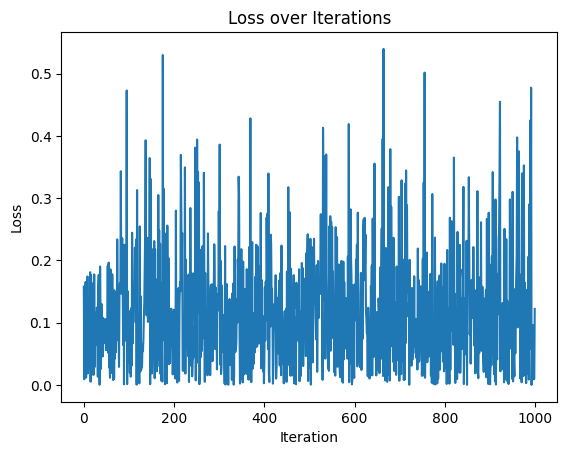

In [21]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

https://neptune.ai/blog/deep-learning-visualization
https://distill.pub/2020/circuits/visualizing-weights/
https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network
https://stackoverflow.com/questions/58676093/visualizing-neural-network-using-python

In [24]:
print(x)
print(W[:,0])
y =  x @ W
print(y)
print(x[0,:]@W[:,0])

W_max = torch.max(torch.abs(W), axis=0)[0]
print(W_max)
W_normalized = W / W_max
print(W_normalized[:,0])

tensor([[-0.0365, -0.4099,  0.0097,  0.4627,  1.0000,  1.0000]])
tensor([-0.3253,  0.2010, -0.6807,  0.2461, -0.0409, -0.1829],
       grad_fn=<SelectBackward0>)
tensor([[-0.1870, -1.0409,  1.8573,  0.9274, -0.5684,  2.3335]],
       grad_fn=<MmBackward0>)
tensor(-0.1870, grad_fn=<DotBackward0>)
tensor([0.6807, 2.1152, 1.2032, 1.2633, 1.3527, 2.3022],
       grad_fn=<MaxBackward0>)
tensor([-0.4779,  0.2953, -1.0000,  0.3615, -0.0600, -0.2687],
       grad_fn=<SelectBackward0>)


Text(0, 0.5, 'Rows')

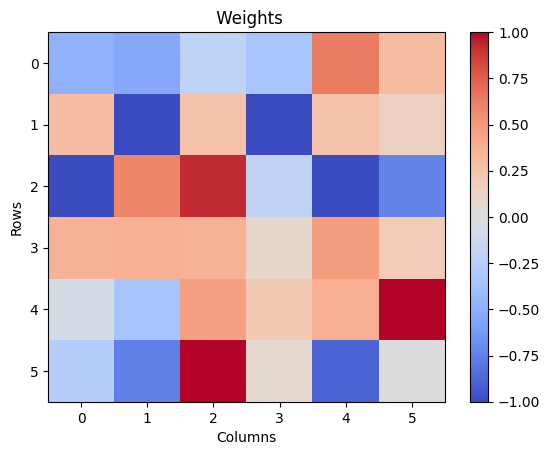

In [23]:
# plt.subplot(1, 2, 1)
plt.title(" Weights")
plt.imshow(W_normalized.detach().numpy(), cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')

In [86]:
from torchviz import make_dot


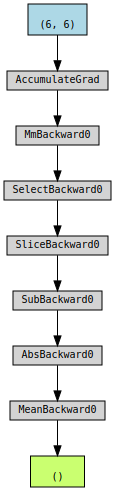

In [87]:
make_dot(loss)